## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 128us/step - loss: 2.0588 - acc: 0.2661 - val_loss: 1.9317 - val_acc: 0.2984
Epoch 2/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.8763 - acc: 0.3380 - val_loss: 1.8611 - val_acc: 0.3340
Epoch 3/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.8093 - acc: 0.3636 - val_loss: 1.7982 - val_acc: 0.3681
Epoch 4/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.7631 - acc: 0.3797 - val_loss: 1.7439 - val_acc: 0.3912
Epoch 5/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.7236 - acc: 0.3940 - val_loss: 1.7379 - val_acc: 0.3867
Epoch 6/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.6986 - acc: 0.4035 - val_loss: 1.6793 - val_acc: 0.4089
Epoch 7/500
50000/50000 [==============================] - 5s 101us/st

Epoch 58/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1773 - acc: 0.5883 - val_loss: 1.6936 - val_acc: 0.4202
Epoch 59/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1756 - acc: 0.5901 - val_loss: 1.3880 - val_acc: 0.5154
Epoch 60/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1667 - acc: 0.5920 - val_loss: 1.4234 - val_acc: 0.5026
Epoch 61/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.1650 - acc: 0.5935 - val_loss: 1.4046 - val_acc: 0.5089
Epoch 62/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.1658 - acc: 0.5941 - val_loss: 1.3852 - val_acc: 0.5150
Epoch 63/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.1532 - acc: 0.5971 - val_loss: 1.3648 - val_acc: 0.5076
Epoch 64/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1429 - acc: 0.6015 - val_loss: 1.4440 - val_acc: 0.4890
Epoch 65/500
50000/50000 [=

Epoch 117/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.8618 - acc: 0.7022 - val_loss: 1.4295 - val_acc: 0.5280
Epoch 118/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.8577 - acc: 0.7052 - val_loss: 1.5723 - val_acc: 0.4902
Epoch 119/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.8493 - acc: 0.7073 - val_loss: 1.3648 - val_acc: 0.5309
Epoch 120/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8413 - acc: 0.7103 - val_loss: 1.4489 - val_acc: 0.5158
Epoch 121/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.8312 - acc: 0.7122 - val_loss: 1.4555 - val_acc: 0.5065
Epoch 122/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.8401 - acc: 0.7103 - val_loss: 1.3643 - val_acc: 0.5424
Epoch 123/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.8285 - acc: 0.7141 - val_loss: 1.5106 - val_acc: 0.5168
Epoch 124/500
50000/

50000/50000 [==============================] - 4s 90us/step - loss: 0.5779 - acc: 0.8023 - val_loss: 1.7748 - val_acc: 0.4817
Epoch 176/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.5662 - acc: 0.8103 - val_loss: 1.6570 - val_acc: 0.5104
Epoch 177/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.5586 - acc: 0.8126 - val_loss: 2.1366 - val_acc: 0.4260
Epoch 178/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.5602 - acc: 0.8116 - val_loss: 1.6567 - val_acc: 0.5107
Epoch 179/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.5589 - acc: 0.8114 - val_loss: 1.6279 - val_acc: 0.5227
Epoch 180/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.5463 - acc: 0.8176 - val_loss: 1.5730 - val_acc: 0.5342
Epoch 181/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.5359 - acc: 0.8205 - val_loss: 1.6051 - val_acc: 0.5290
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 0.3368 - acc: 0.8983 - val_loss: 1.9245 - val_acc: 0.5171
Epoch 234/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3437 - acc: 0.8934 - val_loss: 2.3128 - val_acc: 0.4924
Epoch 235/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.3563 - acc: 0.8899 - val_loss: 1.9524 - val_acc: 0.5257
Epoch 236/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.3133 - acc: 0.9003 - val_loss: 1.8048 - val_acc: 0.5437
Epoch 237/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2846 - acc: 0.9138 - val_loss: 1.8614 - val_acc: 0.5337
Epoch 238/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.3334 - acc: 0.8987 - val_loss: 2.1002 - val_acc: 0.4986
Epoch 239/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2787 - acc: 0.9155 - val_loss: 1.8860 - val_acc: 0.5303
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.2044 - acc: 0.9432 - val_loss: 2.2214 - val_acc: 0.5094
Epoch 292/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1080 - acc: 0.9764 - val_loss: 2.2056 - val_acc: 0.5348
Epoch 293/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.0973 - acc: 0.9803 - val_loss: 2.4829 - val_acc: 0.5073
Epoch 294/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2196 - acc: 0.9433 - val_loss: 2.1552 - val_acc: 0.5399
Epoch 295/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0937 - acc: 0.9818 - val_loss: 2.3668 - val_acc: 0.5272
Epoch 296/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.1853 - acc: 0.9559 - val_loss: 2.1654 - val_acc: 0.5196
Epoch 297/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1263 - acc: 0.9693 - val_loss: 2.2004 - val_acc: 0.5402
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 5s 90us/step - loss: 0.0409 - acc: 0.9958 - val_loss: 2.5618 - val_acc: 0.5329
Epoch 350/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0393 - acc: 0.9959 - val_loss: 2.5029 - val_acc: 0.5408
Epoch 351/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0360 - acc: 0.9966 - val_loss: 2.5259 - val_acc: 0.5425
Epoch 352/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0346 - acc: 0.9972 - val_loss: 2.5298 - val_acc: 0.5447
Epoch 353/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.0337 - acc: 0.9971 - val_loss: 2.5270 - val_acc: 0.5402
Epoch 354/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0330 - acc: 0.9971 - val_loss: 2.5877 - val_acc: 0.5381
Epoch 355/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0315 - acc: 0.9975 - val_loss: 2.5536 - val_acc: 0.5395
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.0123 - acc: 0.9998 - val_loss: 2.8854 - val_acc: 0.5319
Epoch 408/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0125 - acc: 0.9997 - val_loss: 2.8336 - val_acc: 0.5379
Epoch 409/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0121 - acc: 0.9997 - val_loss: 2.8440 - val_acc: 0.5403
Epoch 410/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0120 - acc: 0.9997 - val_loss: 2.8448 - val_acc: 0.5407
Epoch 411/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0117 - acc: 0.9998 - val_loss: 2.8538 - val_acc: 0.5391
Epoch 412/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0115 - acc: 0.9998 - val_loss: 2.8501 - val_acc: 0.5387
Epoch 413/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0115 - acc: 0.9998 - val_loss: 2.8510 - val_acc: 0.5383
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.0272 - val_acc: 0.5376
Epoch 466/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0314 - val_acc: 0.5388
Epoch 467/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0407 - val_acc: 0.5377
Epoch 468/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0379 - val_acc: 0.5374
Epoch 469/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.0394 - val_acc: 0.5380
Epoch 470/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0063 - acc: 0.9999 - val_loss: 3.0447 - val_acc: 0.5381
Epoch 471/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.0624 - val_acc: 0.5373
Epoch 472/500
50000/50000 [=======

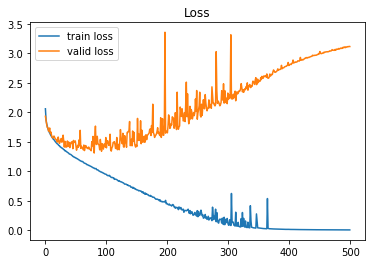

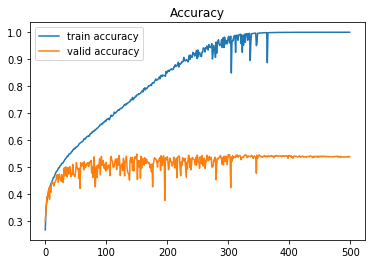

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()